# 04. 다양한 회귀 알고리즘

## 1. Decision Tree (결정트리)Regression 

> - 데이터를 여러개의 규칙 기반 분할을 통해 학습한다.
> - 구간 평균으로 예측을 한다.

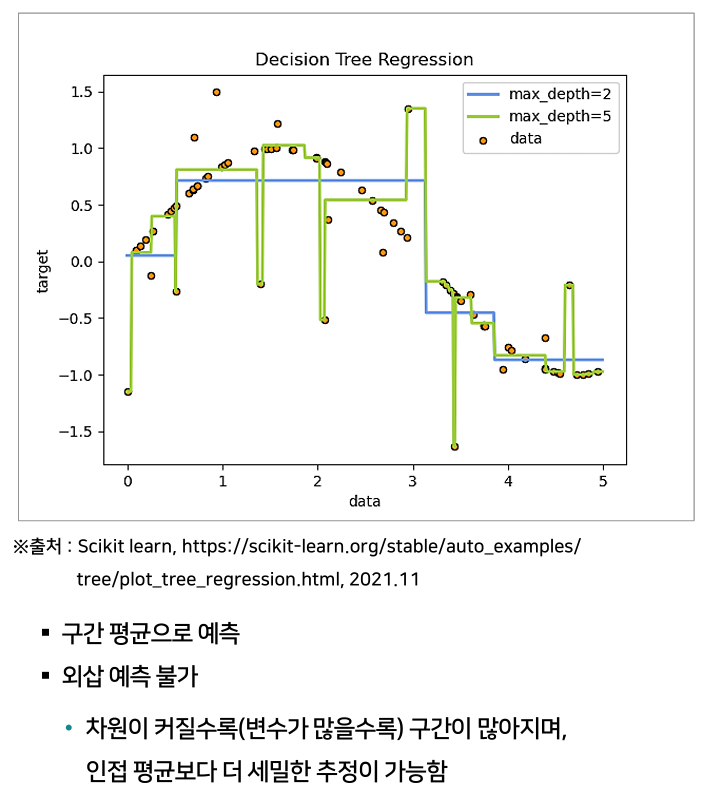

In [1]:
from IPython.display import Image
Image("img/img04_01.png", width=600)

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeRegressor, plot_tree
from sklearn.metrics import mean_absolute_error, r2_score

의사결정 나우 회귀 (결정계수) : 0.51
의사결정 나우 회귀 (MAE) : 0.60


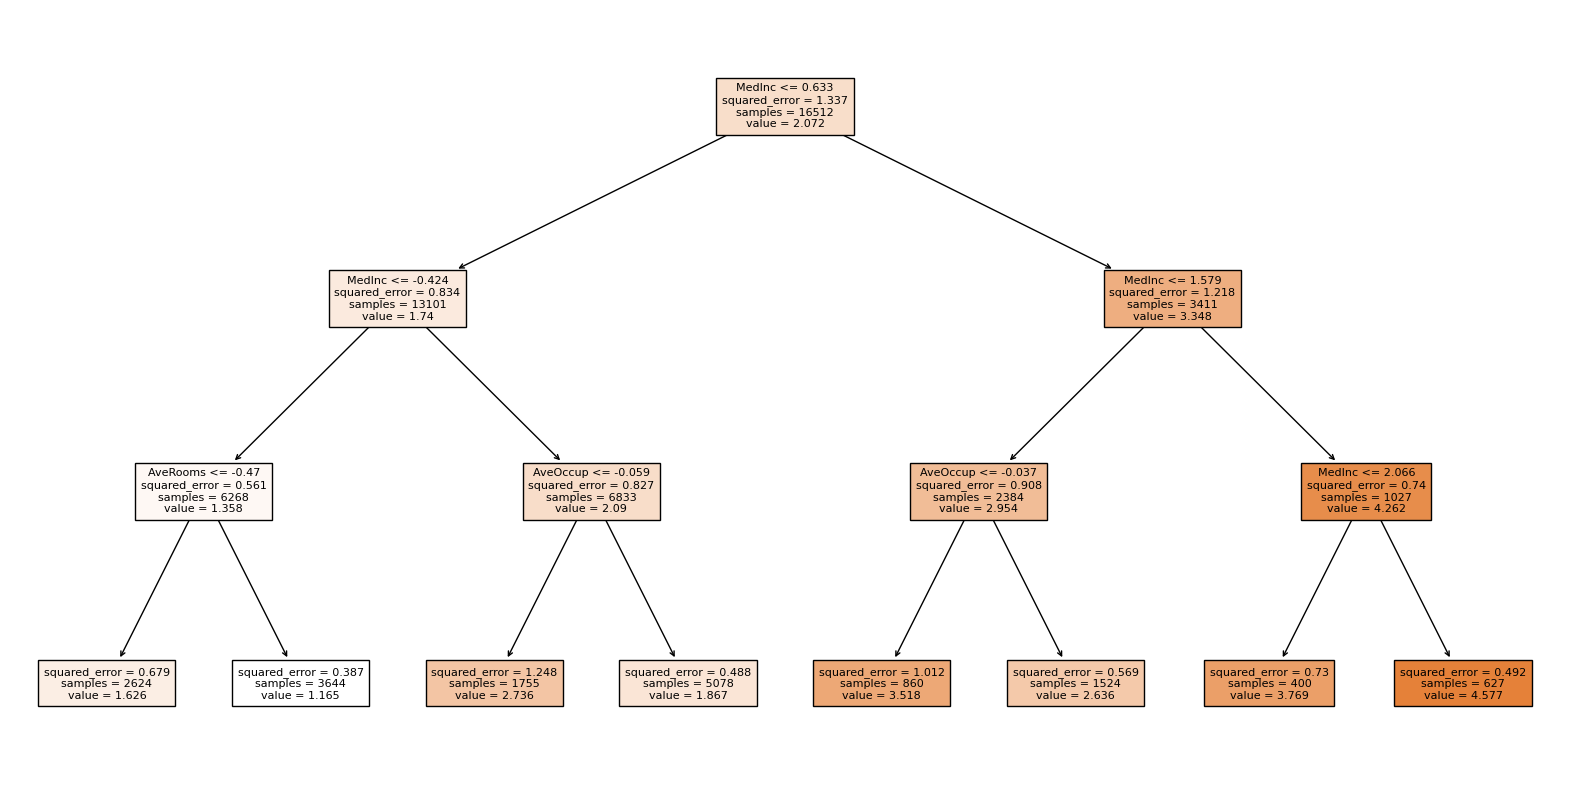

In [3]:
# 캘리포니아 주택 가격 데이터셋 로그
california = fetch_california_housing()

# 특성과 타켓 분리
x, y = california.data, california.target

# 훈련세트와 테스트 셋트 분리
X_train, X_test, Y_train, Y_test = train_test_split(x, y, test_size=0.2, random_state=42)

# 정규화
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# 모델 생성 (트리 깊이)
tree = DecisionTreeRegressor(random_state=42, max_depth=3)
tree.fit(X_train, Y_train)

# 테스트 세트에 대한 예측
Y_pred = tree.predict(X_test)

# 결정계수 (R2)
r2 = r2_score(Y_test, Y_pred)
print("의사결정 나우 회귀 (결정계수) : {:.2f}" .format(r2))

# 평균 절대 오차 (MAE)
mae = mean_absolute_error(Y_test, Y_pred)
print("의사결정 나우 회귀 (MAE) : {:.2f}" .format(mae))

# 트리구조 시각화
plt.figure(figsize=(20,10))
plot_tree(tree, filled=True, feature_names=california.feature_names, fontsize=8)
plt.show()


## 2. K-최근접 이웃 회귀

> - 주어진 데이터 포인트의 최근접 이웃 K개를 참조하여 예측값을 결정하는 회귀기법
> - 예측 데이터와 가장 가까운 K개의 학습 데이터의 평균값(y)으로 예측함
> - 거리를 기반으로 하는 모델은 스케일링이 필수적이다.

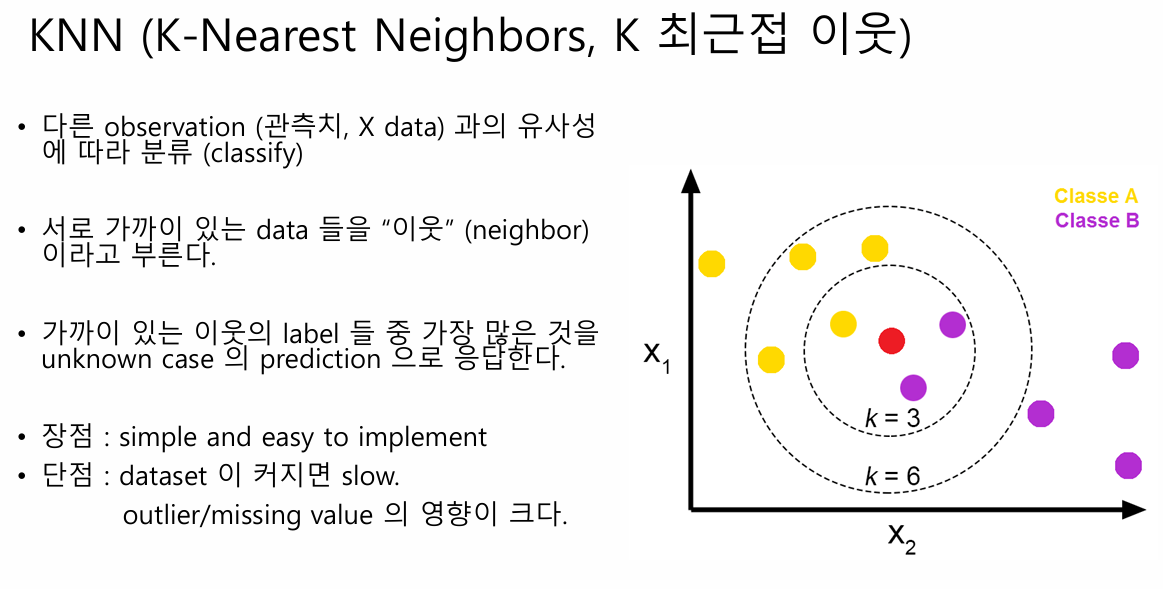

In [4]:
Image("img/img04_03.png", width=600)

In [5]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_absolute_error, r2_score

KNeighborsRegressor : 최적의 k 값 11
KNeighborsRegressor : 결정계수 값 0.6805629031793323
평균 절대 오차 (MAE) :  0.43843182302677935


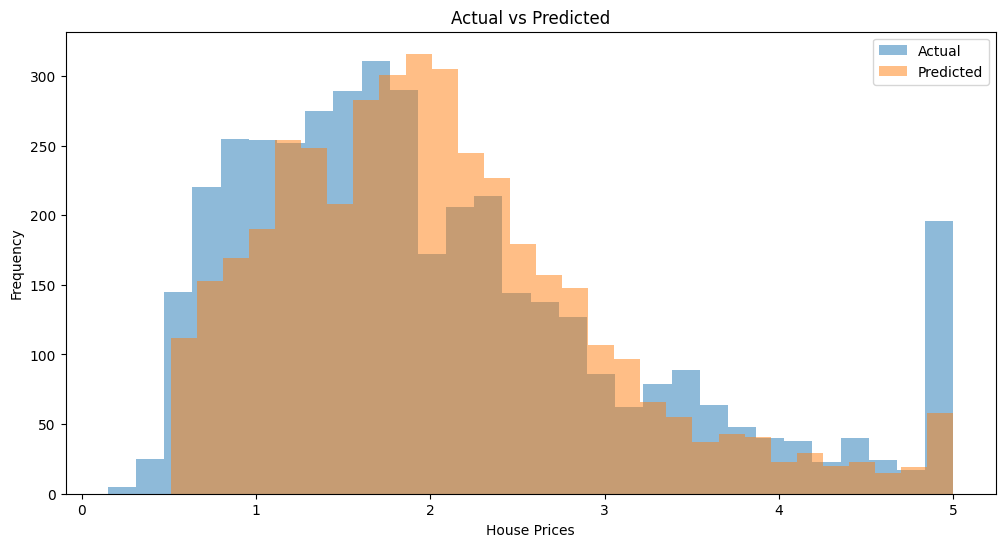

In [6]:
# 캘리포니아 주택가격 데이터 셋 로드
california = fetch_california_housing()

# 특성과 타켓 변수를 분리
x, y = california.data,  california.target

# 훈련세트와 테스트세트로 분리
X_train, X_test, Y_train, Y_test = train_test_split(x, y, test_size=0.2, random_state=42)

# 데이터 스케일링(표준화)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# 모델 생성 
knn = KNeighborsRegressor()

# 교차 검증을 이용해서 최적의 k 값 찾기
param_grid = {'n_neighbors':np.arange(1,30)}
grid_search = GridSearchCV(knn, param_grid, cv=5, scoring='r2')
grid_search.fit(X_train, Y_train)

# 최적의 K값으로 모델 생성 및 훈련
best_k = grid_search.best_params_['n_neighbors']
knn_best = KNeighborsRegressor(n_neighbors=best_k)
knn_best.fit(X_train, Y_train)

# 테스트 셋트에 대한 예측
Y_pred = knn_best.predict(X_test)

# 결정계수
r2 = r2_score(Y_test, Y_pred)
print("KNeighborsRegressor : 최적의 k 값 {}" .format(best_k))
print("KNeighborsRegressor : 결정계수 값 {}" .format(r2))

# 평균 절대 오차 (MAE)
mae = mean_absolute_error(Y_test, Y_pred)
print("평균 절대 오차 (MAE) : " , mae)

# 시각화 (히스토그램)
plt.figure(figsize=(12,6))
plt.hist(Y_test, bins = 30, alpha=0.5, label='Actual')
plt.hist(Y_pred, bins = 30, alpha=0.5, label='Predicted')
plt.xlabel("House Prices")
plt.ylabel("Frequency")
plt.title("Actual vs Predicted")
plt.legend()
plt.show()


## 3. SVR(Support Vector Regression)

> - 원래는 분류문제를 해결하기 위해서 개발되었으나 회귀문제에도 적용할 수 있음
> - 데이터 포인트 사이의 거리를 최소화하면서 최적의 초평면을 찾는 방식
> - MSE 와 L2 손실을 최소화 하기 위해 스케일링을 해야 함

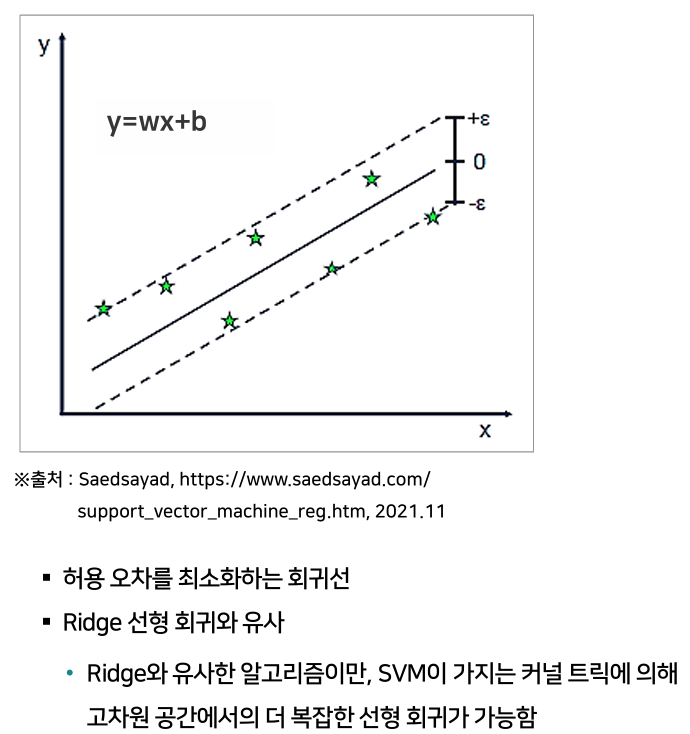

In [7]:
Image("img/img04_02.png")

svr : 결정계수 값 0.7275639524733043
평균 절대 오차 (MAE) :  0.3985982830145758


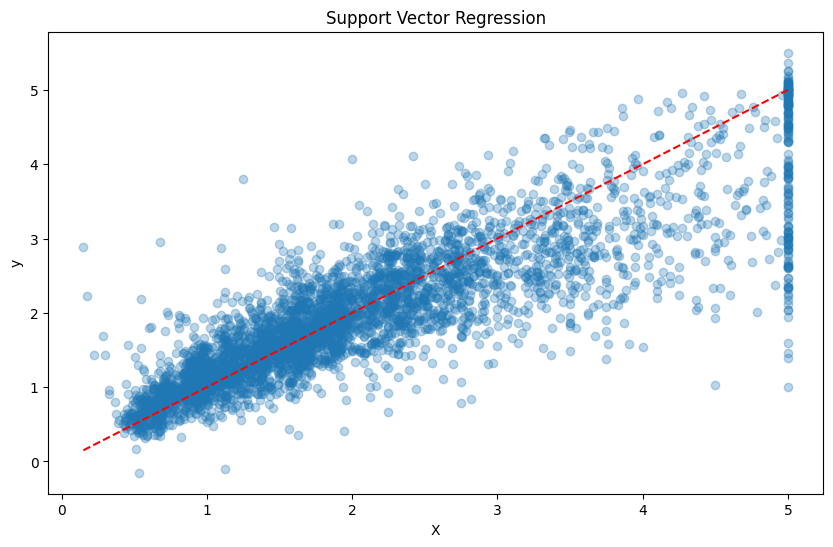

In [11]:
from sklearn.svm import SVR

# 캘리포니아 주택가격 데이터 셋 로드
california = fetch_california_housing()

# 특성과 타켓 변수를 분리
x, y = california.data,  california.target

# 훈련세트와 테스트세트로 분리
X_train, X_test, Y_train, Y_test = train_test_split(x, y, test_size=0.2, random_state=42)

# 데이터 스케일링(표준화)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# 모델 생성 
# kernel : rbf 비선형 데이터를 모델링 , linear (선형커널), sigmoid (시그모이드)
# C 값이 클수록 모델은 오차를 줄이기 위해서 더 많이 노력하지만, 과적합의 위험이 있음
# C 값은 모델의 복잡도와 오차 허용 사이의 균형을 조절한다. 
# epsilon는 마진의 너비 : 작게 설정하면 더 많은 데이터 포인트를 고려
svr = SVR(kernel='rbf', C=1.0, epsilon=0.1)
svr.fit(X_train, Y_train)

# 테스트 셋트에 대한 예측
Y_pred = svr.predict(X_test)

# 결정계수
r2 = r2_score(Y_test, Y_pred)
print("svr : 결정계수 값 {}" .format(r2))

# 평균 절대 오차 (MAE)
mae = mean_absolute_error(Y_test, Y_pred)
print("평균 절대 오차 (MAE) : " , mae)

# 예측 결과 시각화
plt.figure(figsize=(10,6))
plt.scatter(Y_test, Y_pred, alpha=0.3)
plt.plot([Y_test.min(), Y_test.max()],[Y_test.min(), Y_test.max()], 'r--')
plt.xlabel('X')
plt.ylabel('y')
plt.title('Support Vector Regression')
plt.show()